In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('jobs_cleaned_data.csv')

In [4]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,Company_name,job_state,same_state,age,ownership,python,matlab,cloud,sql,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,Tecolote Research\n,NM,0,49,1,1,1,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,University of Maryland Medical System\n,MD,0,38,0,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,KnowBe4\n,FL,1,12,1,1,0,0,1,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,PNNL\n,WA,1,57,0,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,Affinity Solutions\n,NY,1,24,1,1,0,1,1,1


In [5]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly ', 'Employer Provided Salary', 'min_salary(in k)',
       'max_salary(in k)', 'average_salary', 'Company_name', 'job_state',
       'same_state', 'age', 'ownership', 'python', 'matlab', 'cloud', 'sql',
       'excel'],
      dtype='object')

In [6]:
des = df['Job Title'].value_counts()
print(des)

Data Scientist                     131
Data Engineer                       53
Senior Data Scientist               34
Data Analyst                        15
Senior Data Engineer                14
                                  ... 
Data Scientist/ML Engineer           1
Sr. Data Scientist                   1
Data Engineer 4 - Contract           1
Data Analyst - Asset Management      1
Machine Learning Engineer (NLP)      1
Name: Job Title, Length: 264, dtype: int64


In [7]:
def title_simplifer(title):
    if 'data scientist' in title.lower():
        return 'Data Scientist'
    elif 'data engineer' in title.lower():
        return 'Data Engineer'
    elif 'analyst' in title.lower():
        return 'Analyst'
    elif 'machine learning' in title.lower():
        return 'MLE'
    elif 'manager' in title.lower():
        return 'Manager'
    elif 'director' in title.lower():
        return 'Director'
    else:
        return 'NA'

In [8]:
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower():
        return 'Senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower() or 'junior' in title.lower():
        return 'Junior'
    else:
        return 'NA'

In [9]:
df['job_simplified'] = df['Job Title'].apply(title_simplifer)

In [10]:
df['job_simplified'].value_counts()

Data Scientist    279
NA                184
Data Engineer     119
Analyst           102
Manager            22
MLE                22
Director           14
Name: job_simplified, dtype: int64

In [11]:
df['seniority'] = df['Job Title'].apply(seniority)

In [12]:
df['seniority'].value_counts()

NA        544
Senior    195
Junior      3
Name: seniority, dtype: int64

In [13]:
df['Company_name'] = df['Company_name'].apply(lambda x : x.replace('\n',''))

In [14]:
df['Company_name']

0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
                       ...                  
737                                      GSK
738                               Eventbrite
739           Software Engineering Institute
740                             Numeric, LLC
741             Riverside Research Institute
Name: Company_name, Length: 742, dtype: object

In [15]:
# fix state los angles
df['job_state'] = df['job_state'].apply(lambda x : x.strip() if x.strip().lower() != 'los angeles' else 'LA')

In [16]:
print(df['job_state'].value_counts())

CA    151
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
NC     21
WA     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
WI     10
UT     10
IN     10
AZ      9
MO      9
AL      8
GA      6
DE      6
KY      6
MI      6
LA      5
CT      5
IA      5
OR      4
NE      4
NM      3
KS      3
ID      2
MN      2
RI      1
SC      1
Name: job_state, dtype: int64


In [17]:
df.rename(columns = {'Company_name':'company_name','hourly ':'hourly'},inplace= True)

In [18]:
print(df.iloc[126])

Job Title                                                      Data Scientist
Salary Estimate                                   $82K-$133K (Glassdoor est.)
Job Description             For more than 50 years, Accuride International...
Rating                                                                    3.6
Company Name                                      Accuride International\n3.6
Location                                    Santa Fe Springs, Los Angeles, CA
Headquarters                                             Santa Fe Springs, CA
Size                                                   1001 to 5000 employees
Founded                                                                  1966
Type of ownership                                           Company - Private
Industry                                             Industrial Manufacturing
Sector                                                          Manufacturing
Revenue                                            $100 to $500 

In [19]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'Employer Provided Salary', 'min_salary(in k)',
       'max_salary(in k)', 'average_salary', 'company_name', 'job_state',
       'same_state', 'age', 'ownership', 'python', 'matlab', 'cloud', 'sql',
       'excel', 'job_simplified', 'seniority'],
      dtype='object')

In [20]:
#hourly wage to annual
df['min_salary(in k)'] = df.apply(lambda x : x['min_salary(in k)']*2 if x['hourly']==1 else x['min_salary(in k)'] ,axis = 1)

In [21]:
df['max_salary(in k)'] = df.apply(lambda x : x['max_salary(in k)']*2 if x['hourly']==1 else x['max_salary(in k)'] ,axis = 1)

In [22]:
df[df.hourly==1][['hourly','min_salary(in k)','max_salary(in k)']]

,hourly,min_salary(in k),max_salary(in k)
165,1,34,48
177,1,42,68
197,1,36,50
202,1,42,68
210,1,30,50
246,1,34,48
271,1,42,68
337,1,36,50
345,1,48,78
357,1,42,68


In [23]:
df.describe()

,Rating,Founded,hourly,Employer Provided Salary,min_salary(in k),max_salary(in k),average_salary,same_state,age,ownership,python,matlab,cloud,sql,excel
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,48.524259,0.552561,0.528302,0.074124,0.223720,0.512129,0.522911
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.839080,0.497565,0.499535,0.262149,0.417017,0.500190,0.499812
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,26.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,61.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,278.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'Employer Provided Salary', 'min_salary(in k)',
       'max_salary(in k)', 'average_salary', 'company_name', 'job_state',
       'same_state', 'age', 'ownership', 'python', 'matlab', 'cloud', 'sql',
       'excel', 'job_simplified', 'seniority'],
      dtype='object')

<AxesSubplot:>

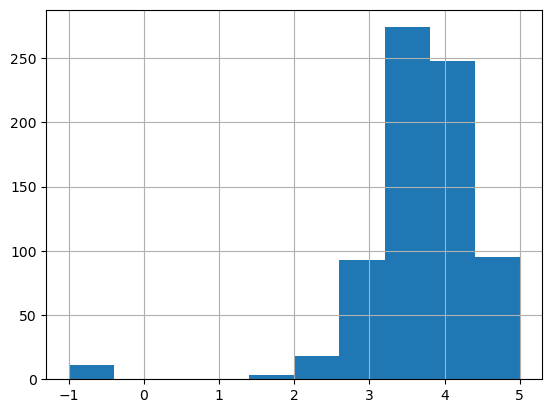

In [25]:
df['Rating'].hist()

<AxesSubplot:>

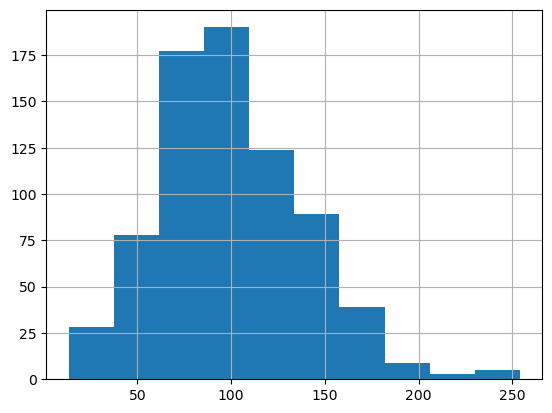

In [26]:
df['average_salary'].hist()

<AxesSubplot:>

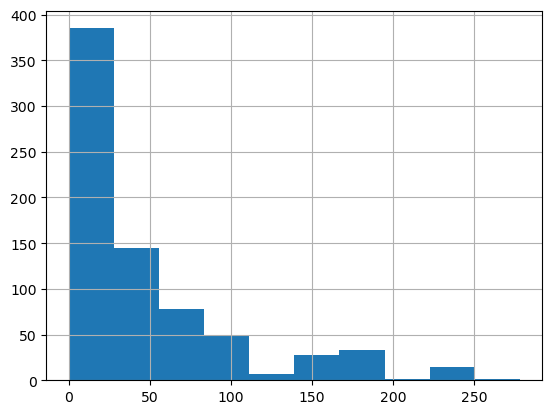

In [28]:
df['age'].hist()

<AxesSubplot:>

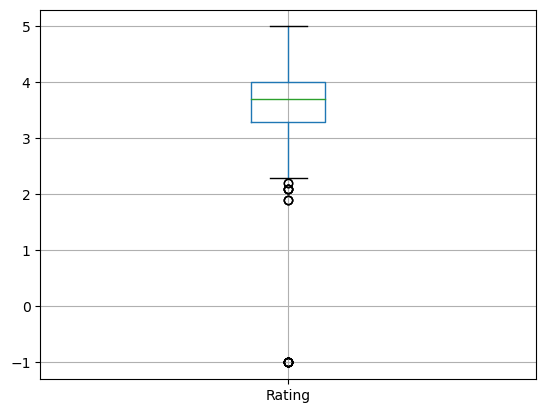

In [30]:
df.boxplot(column = ['Rating'])

In [32]:
df.corr()

,Rating,Founded,hourly,Employer Provided Salary,min_salary(in k),max_salary(in k),average_salary,same_state,age,ownership,python,matlab,cloud,sql,excel
Rating,1.000000,0.332927,-0.019531,-0.468234,-0.009573,0.027344,0.013492,0.085033,0.023162,0.040840,0.144665,-0.033654,0.106906,0.134463,-0.036466
Founded,0.332927,1.000000,0.049313,-0.312761,-0.033999,0.006776,-0.015149,0.171512,0.139165,0.001094,0.103183,0.024845,0.015350,0.052368,-0.035567
hourly,-0.019531,0.049313,1.000000,0.124748,-0.203556,-0.276730,-0.356082,-0.067351,0.007847,-0.141891,-0.193487,-0.051730,-0.098149,-0.187319,-0.099897
Employer Provided Salary,-0.468234,-0.312761,0.124748,1.000000,0.187591,0.028794,0.076287,-0.081349,-0.110649,0.101564,-0.107924,0.025440,-0.082205,-0.138869,0.074129
min_salary(in k),-0.009573,-0.033999,-0.203556,0.187591,1.000000,0.940136,0.967765,-0.051097,0.002953,0.028622,0.326910,0.125691,0.099603,0.018769,-0.075234
max_salary(in k),0.027344,0.006776,-0.276730,0.028794,0.940136,1.000000,0.986862,-0.032784,0.034404,0.011196,0.301481,0.126793,0.130544,-0.007270,-0.067175
average_salary,0.013492,-0.015149,-0.356082,0.076287,0.967765,0.986862,1.000000,-0.034641,0.019574,0.032936,0.327796,0.129781,0.126851,0.024589,-0.057252
same_state,0.085033,0.171512,-0.067351,-0.081349,-0.051097,-0.032784,-0.034641,1.000000,-0.165792,0.094089,0.006975,-0.121066,-0.017061,0.130179,0.106026
age,0.023162,0.139165,0.007847,-0.110649,0.002953,0.034404,0.019574,-0.165792,1.000000,-0.251833,-0.098626,0.100605,-0.119135,-0.117977,0.038846
ownership,0.040840,0.001094,-0.141891,0.101564,0.028622,0.011196,0.032936,0.094089,-0.251833,1.000000,0.110743,-0.076467,0.164387,0.070638,0.073836


<AxesSubplot:>

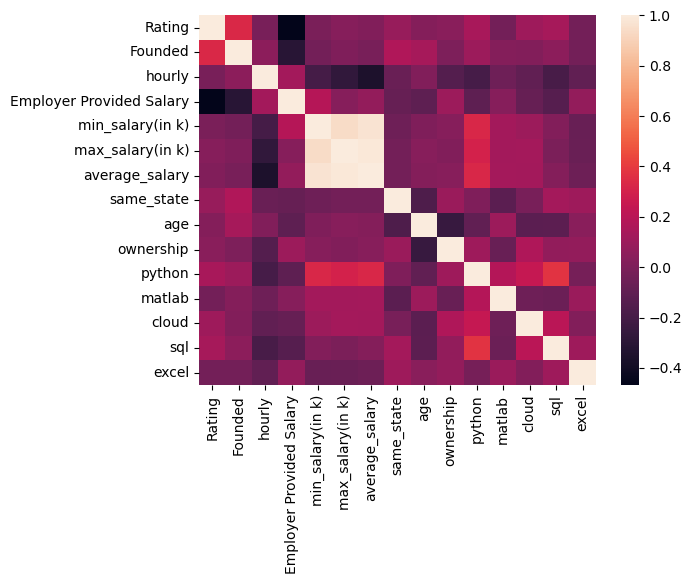

In [35]:
sns.heatmap(df.corr())

In [39]:
df[['age','average_salary','Rating','Employer Provided Salary','Founded']].corr()

,age,average_salary,Rating,Employer Provided Salary,Founded
age,1.000000,0.019574,0.023162,-0.110649,0.139165
average_salary,0.019574,1.000000,0.013492,0.076287,-0.015149
Rating,0.023162,0.013492,1.000000,-0.468234,0.332927
Employer Provided Salary,-0.110649,0.076287,-0.468234,1.000000,-0.312761
Founded,0.139165,-0.015149,0.332927,-0.312761,1.000000


<AxesSubplot:>

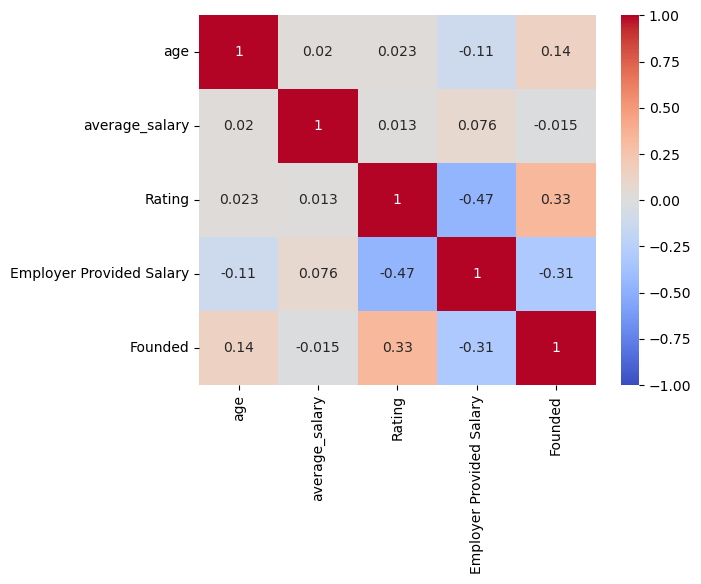

In [40]:
sns.heatmap(df[['age','average_salary','Rating','Employer Provided Salary','Founded']].corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')

In [41]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'Employer Provided Salary', 'min_salary(in k)',
       'max_salary(in k)', 'average_salary', 'company_name', 'job_state',
       'same_state', 'age', 'ownership', 'python', 'matlab', 'cloud', 'sql',
       'excel', 'job_simplified', 'seniority'],
      dtype='object')

In [72]:
 df_categ = df[['Rating','Salary Estimate','Sector','Size','Type of ownership','Revenue','job_state',
       'same_state','ownership']]

In [73]:
df_categ.head()

,Rating,Salary Estimate,Sector,Size,Type of ownership,Revenue,job_state,same_state,ownership
0,3.8,$53K-$91K (Glassdoor est.),Aerospace & Defense,501 to 1000 employees,Company - Private,$50 to $100 million (USD),NM,0,1
1,3.4,$63K-$112K (Glassdoor est.),Health Care,10000+ employees,Other Organization,$2 to $5 billion (USD),MD,0,0
2,4.8,$80K-$90K (Glassdoor est.),Business Services,501 to 1000 employees,Company - Private,$100 to $500 million (USD),FL,1,1
3,3.8,$56K-$97K (Glassdoor est.),"Oil, Gas, Energy & Utilities",1001 to 5000 employees,Government,$500 million to $1 billion (USD),WA,1,0
4,2.9,$86K-$143K (Glassdoor est.),Business Services,51 to 200 employees,Company - Private,Unknown / Non-Applicable,NY,1,1


In [74]:
catg = df_categ['Sector'].value_counts()
catg

Information Technology                180
Biotech & Pharmaceuticals             112
Business Services                      97
Insurance                              69
Health Care                            49
Finance                                42
Manufacturing                          34
Aerospace & Defense                    25
Education                              23
Retail                                 15
Oil, Gas, Energy & Utilities           14
Government                             11
-1                                     10
Non-Profit                              9
Transportation & Logistics              8
Real Estate                             8
Travel & Tourism                        8
Telecommunications                      6
Media                                   6
Arts, Entertainment & Recreation        4
Consumer Services                       4
Mining & Metals                         3
Construction, Repair & Maintenance      3
Agriculture & Forestry            

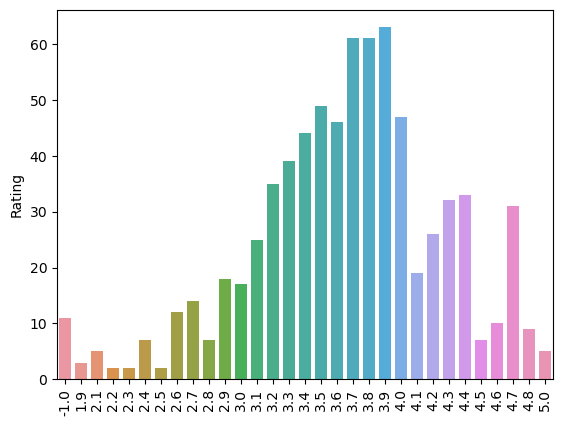

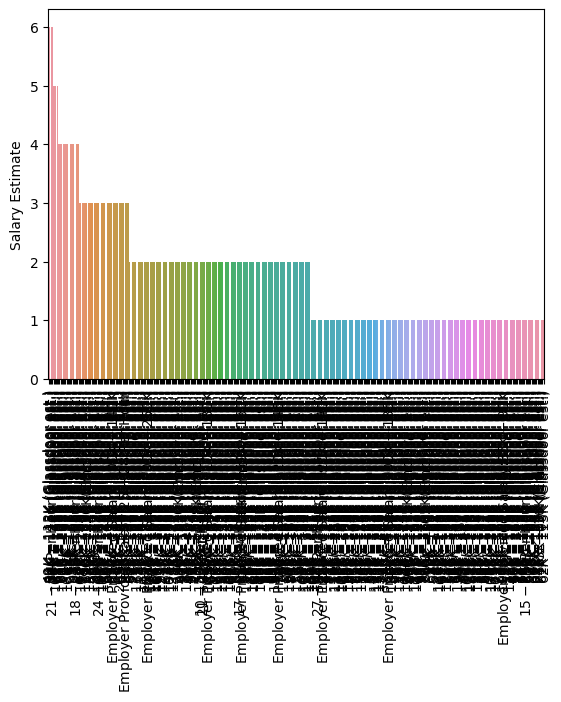

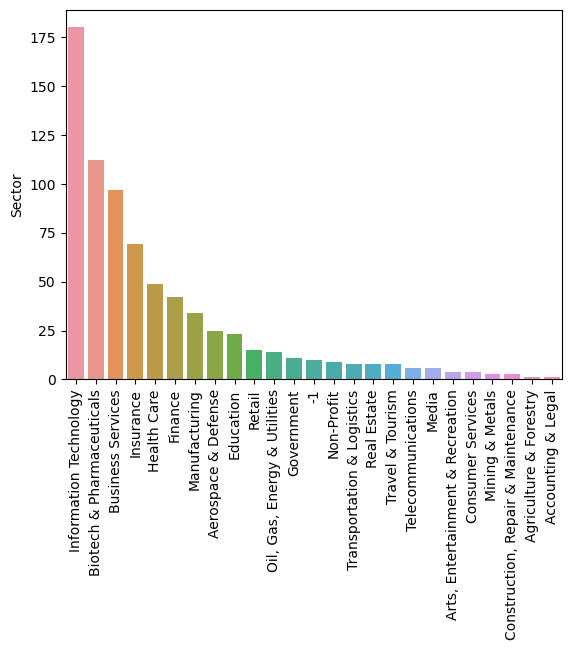

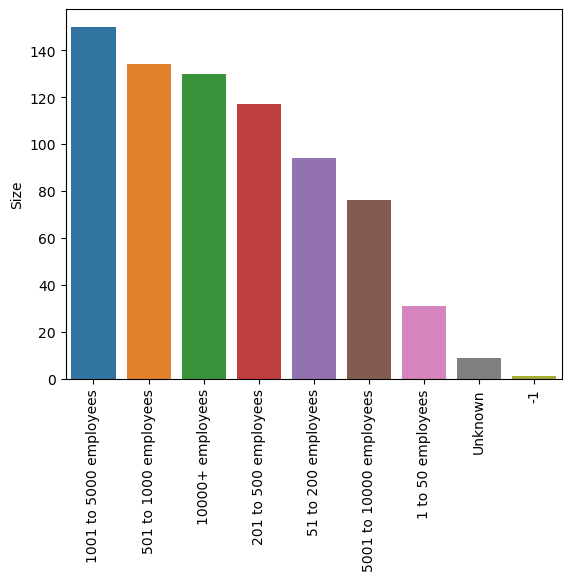

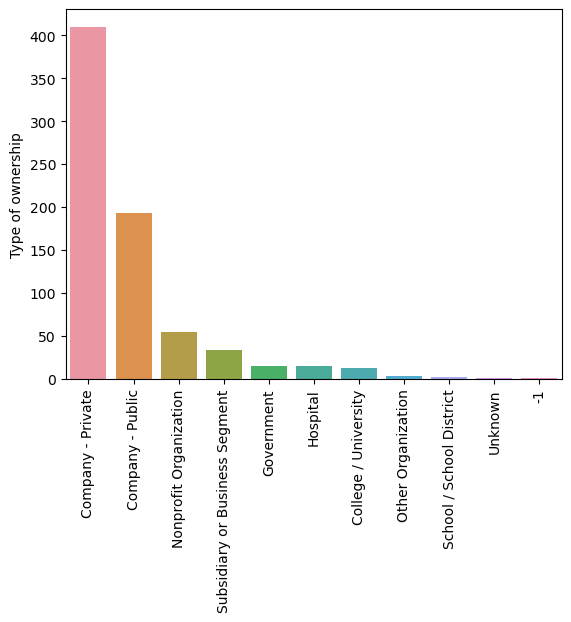

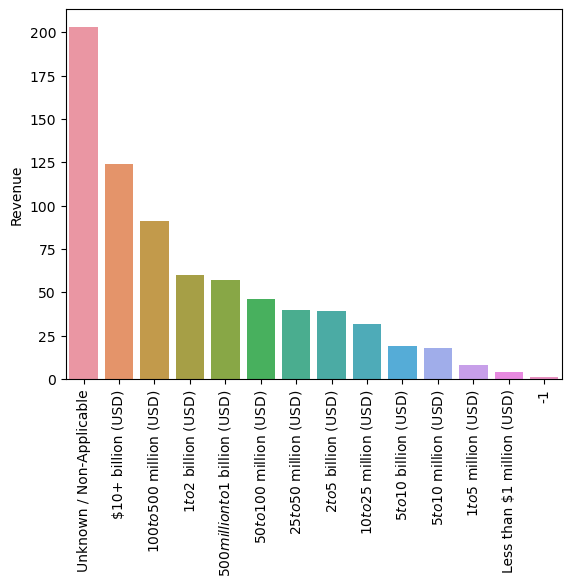

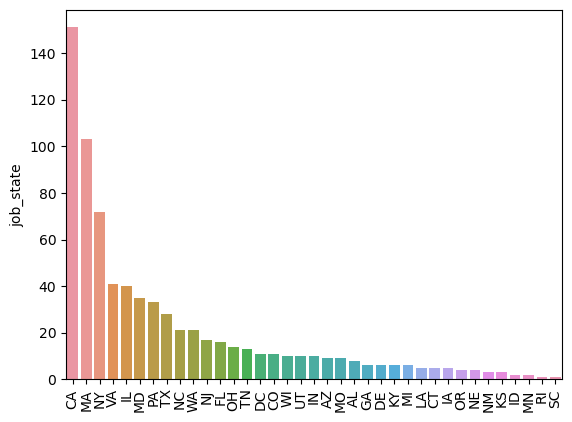

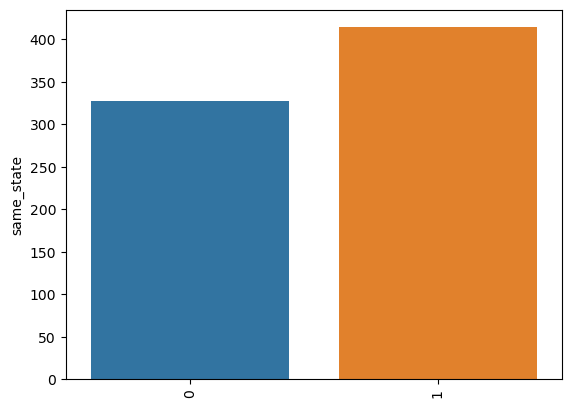

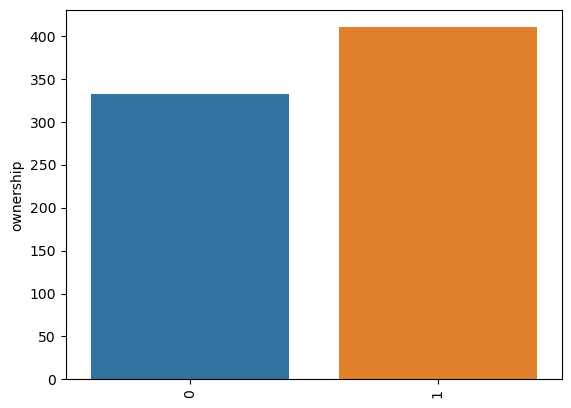

In [75]:
for i in df_categ.columns:
    categ_num = df_categ[i].value_counts()
    #print("graph for %s: total = %d" %(i,len(categ_num)))
    chart = sns.barplot(x=categ_num.index, y = categ_num)
    chart.set_xticklabels(chart.get_xticklabels(),rotation = 90)
    plt.show()

In [78]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'Employer Provided Salary', 'min_salary(in k)',
       'max_salary(in k)', 'average_salary', 'company_name', 'job_state',
       'same_state', 'age', 'ownership', 'python', 'matlab', 'cloud', 'sql',
       'excel', 'job_simplified', 'seniority'],
      dtype='object')

In [77]:
pd.pivot_table(df,index = 'job_simplified',values = 'average_salary')

,average_salary
job_simplified,
Analyst,65.857843
Data Engineer,105.403361
Data Scientist,117.564516
Director,168.607143
MLE,126.431818
Manager,84.022727
NA,84.853261


In [80]:
pd.pivot_table(df,index = 'job_state',values = 'average_salary').sort_values('average_salary',ascending = False)

,average_salary
job_state,
CA,123.619205
IL,116.662500
DC,110.181818
MA,106.281553
NJ,104.558824
MI,100.250000
RI,100.000000
NY,98.652778
NC,98.452381


In [84]:
df_pivots = df[['Rating','Industry','Sector','hourly','Employer Provided Salary','ownership','python']]

In [82]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'Employer Provided Salary', 'min_salary(in k)',
       'max_salary(in k)', 'average_salary', 'company_name', 'job_state',
       'same_state', 'age', 'ownership', 'python', 'matlab', 'cloud', 'sql',
       'excel', 'job_simplified', 'seniority'],
      dtype='object')

In [88]:
df.pivot_table(df,index = 'Revenue',columns = 'python',values = 'average_salary',aggfunc = 'count')

TypeError: pivot_table() got multiple values for argument 'values'

In [91]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [90]:
!pip install wordcloud

     -------------------------------------- 153.1/153.1 kB 2.3 MB/s eta 0:00:00


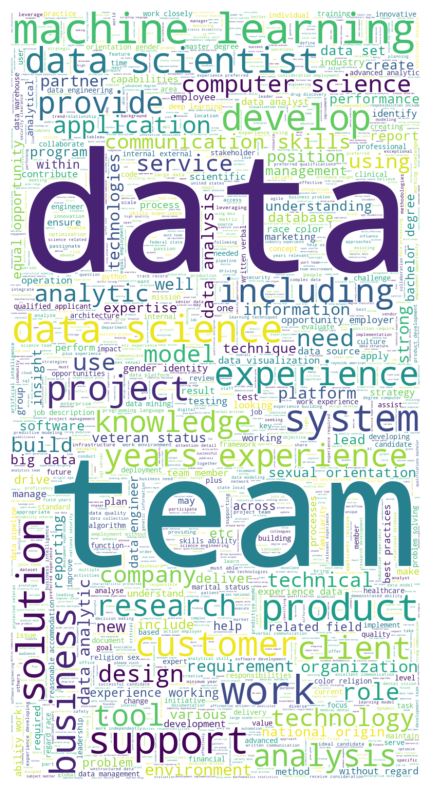

In [98]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

### !pip install nltk

In [97]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\amana\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True